<a href="https://colab.research.google.com/github/yangshen2024/RSeries/blob/main/stastical_thinking326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

df = pd.read_csv('statisdatalogged(withoutgdp).csv')

In [42]:
df

,Country,YEAR,LAB,DI,FDI,HC,TO,FD,EN,CO2
0,Singapore,1990,14.201697,23.632735,2.798716,4.565389,5.844507,4.485632,11.411626,2.432404
1,Singapore,1991,14.240470,23.757545,2.463756,4.558079,5.783480,4.494688,11.398486,2.457780
2,Singapore,1992,14.279117,23.870485,1.654113,4.551769,5.744004,4.501758,11.434894,2.449729
3,Singapore,1993,14.312064,23.963773,2.167075,4.539030,5.750717,4.441143,11.491100,2.558219
4,Singapore,1994,14.353920,24.058199,2.533942,4.641502,5.759585,4.436712,11.594498,2.578794
...,...,...,...,...,...,...,...,...,...,...
97,Malaysia,2019,16.626917,25.155527,1.254754,4.401744,4.820512,4.819532,10.540727,2.155436
98,Malaysia,2020,16.641360,24.999859,0.789709,4.376802,4.768888,4.927933,10.492330,2.137361
99,Malaysia,2021,16.662947,24.992962,1.858835,4.397788,4.905541,4.894458,10.522249,2.146212
100,Malaysia,2022,16.682462,25.058663,1.544770,4.449013,4.993865,4.787525,10.577135,2.186854


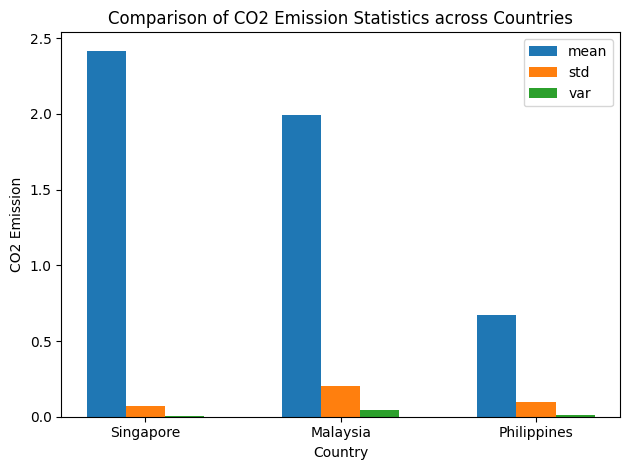

In [11]:
import matplotlib.pyplot as plt
import numpy as np
countries = ['Singapore', 'Malaysia', 'Philippines']
stats = ['mean', 'std', 'var']
country_stats = {}
for country in countries:
    country_data = df[df['Country'] == country]['CO2']
    country_stats[country] = {
        'mean': np.mean(country_data),
        'std': np.std(country_data),
        'var': np.var(country_data)
    }
bar_width = 0.2
index = np.arange(len(countries))
fig, ax = plt.subplots()
for i, stat in enumerate(stats):
    means = [country_stats[country][stat] for country in countries]
    ax.bar(index + i * bar_width, means, bar_width, label=stat)
ax.set_xlabel('Country')
ax.set_ylabel('CO2 Emission')
ax.set_title('Comparison of CO2 Emission Statistics across Countries')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(countries)
ax.legend()
plt.tight_layout()
plt.show()

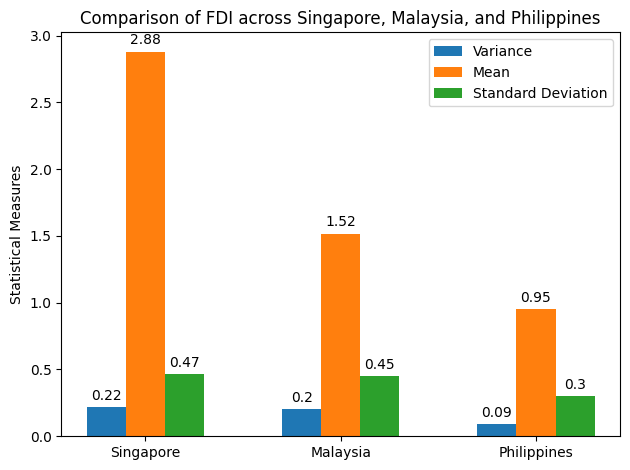

In [43]:
import matplotlib.pyplot as plt
import numpy as np
countries = ['Singapore', 'Malaysia', 'Philippines']
variance = [df[df['Country'] == country]['FDI'].var() for country in countries]
mean = [df[df['Country'] == country]['FDI'].mean() for country in countries]
std = [df[df['Country'] == country]['FDI'].std() for country in countries]
x = np.arange(len(countries))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, variance, width, label='Variance')
rects2 = ax.bar(x, mean, width, label='Mean')
rects3 = ax.bar(x + width, std, width, label='Standard Deviation')
ax.set_ylabel('Statistical Measures')
ax.set_title('Comparison of FDI across Singapore, Malaysia, and Philippines')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

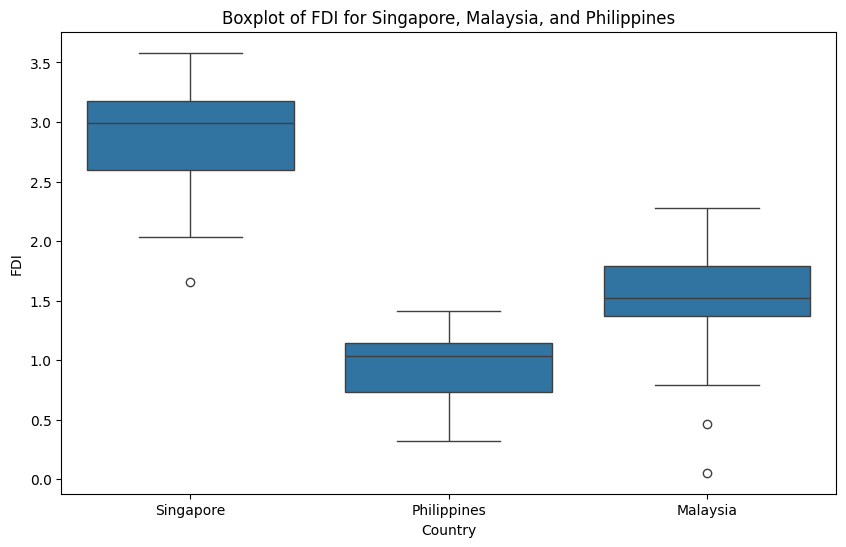

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
countries_to_plot = ['Singapore', 'Malaysia', 'Philippines']
df_filtered = df[df['Country'].isin(countries_to_plot)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='FDI', data=df_filtered)
plt.title('Boxplot of FDI for Singapore, Malaysia, and Philippines')
plt.xlabel('Country')
plt.ylabel('FDI')
plt.show()

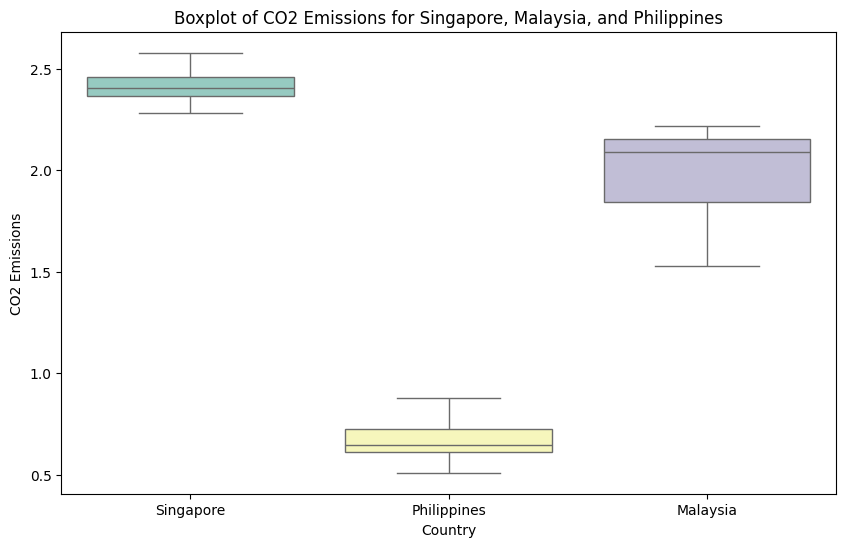

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
countries_to_plot = ['Singapore', 'Malaysia', 'Philippines']
filtered_df = df[df['Country'].isin(countries_to_plot)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='CO2', hue='Country', data=filtered_df, palette='Set3', legend=False)
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.title('Boxplot of CO2 Emissions for Singapore, Malaysia, and Philippines')
plt.show()

In [46]:
import pandas as pd
df = pd.read_csv('statisdatalogged(withoutgdp).csv')
indicator_cols = df.columns.difference(['Country', 'YEAR'])
long_df = df.melt(id_vars=['Country', 'YEAR'],
                  value_vars=indicator_cols,
                  var_name='Indicator',
                  value_name='Value')
summary = long_df.groupby(['Indicator', 'Country'])['Value'].describe()
summary = summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].reset_index()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
summary.style.format(precision=3)

,Indicator,Country,count,mean,std,min,25%,50%,75%,max
0,CO2,Malaysia,34.000,1.995,0.208,1.529,1.842,2.089,2.154,2.218
1,CO2,Philippines,34.000,0.674,0.099,0.510,0.615,0.648,0.726,0.877
2,CO2,Singapore,34.000,2.418,0.074,2.280,2.364,2.403,2.458,2.579
3,DI,Malaysia,34.000,24.613,0.405,23.723,24.323,24.592,24.999,25.177
4,DI,Philippines,34.000,24.277,0.733,22.933,23.700,24.213,24.912,25.396
5,DI,Singapore,34.000,24.650,0.476,23.633,24.391,24.594,25.122,25.264
6,EN,Malaysia,34.000,10.262,0.286,9.529,10.078,10.377,10.491,10.577
7,EN,Philippines,34.000,8.273,0.153,7.981,8.187,8.237,8.359,8.555
8,EN,Singapore,34.000,11.761,0.193,11.398,11.596,11.805,11.928,12.013
9,FD,Malaysia,34.000,4.811,0.171,4.180,4.802,4.839,4.896,4.949


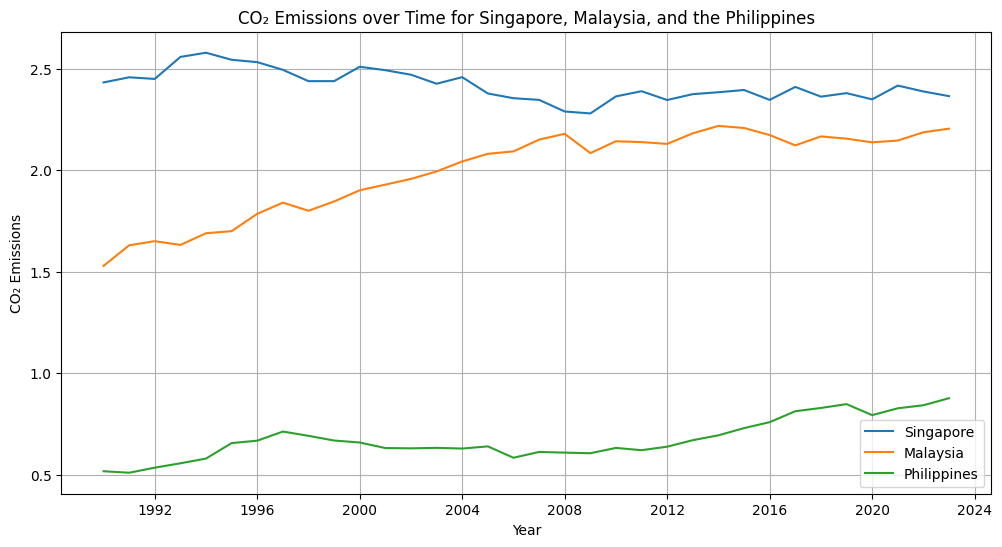

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
countries = ['Singapore', 'Malaysia', 'Philippines']
df_filtered = df[df['Country'].isin(countries)][['Country', 'YEAR', 'CO2']]
df_filtered['YEAR'] = pd.to_datetime(df_filtered['YEAR'], format='%Y')
plt.figure(figsize=(12, 6))
for country in countries:
    df_country = df_filtered[df_filtered['Country'] == country]
    plt.plot(df_country['YEAR'], df_country['CO2'], label=country)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.title("CO₂ Emissions over Time for Singapore, Malaysia, and the Philippines")
plt.legend()
plt.grid(True)
plt.show()

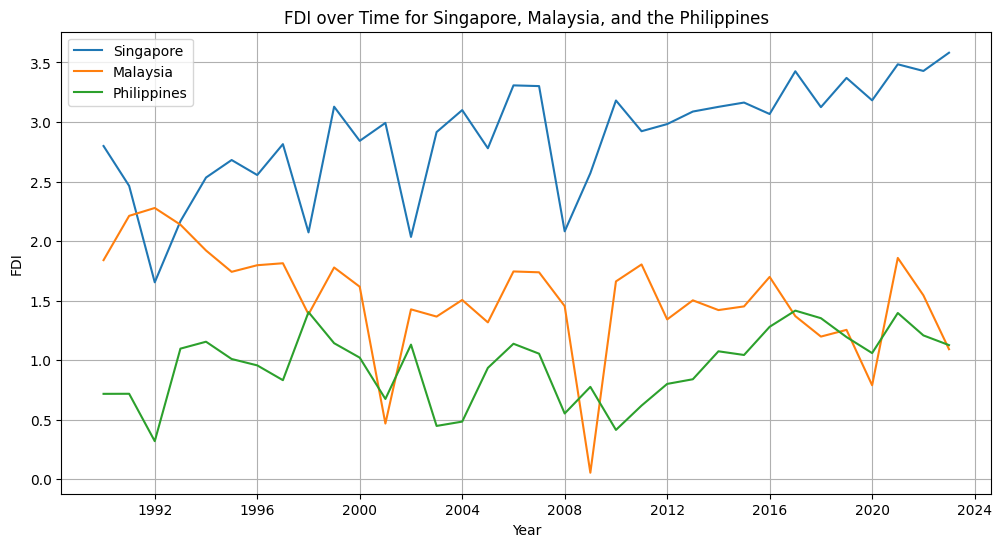

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
countries = ['Singapore', 'Malaysia', 'Philippines']
df_filtered = df[df['Country'].isin(countries)][['Country', 'YEAR', 'FDI']]
df_filtered['YEAR'] = pd.to_datetime(df_filtered['YEAR'], format='%Y')
plt.figure(figsize=(12, 6))
for country in countries:
    df_country = df_filtered[df_filtered['Country'] == country]
    plt.plot(df_country['YEAR'], df_country['FDI'], label=country)
plt.xlabel("Year")
plt.ylabel("FDI")
plt.title("FDI over Time for Singapore, Malaysia, and the Philippines")
plt.legend()
plt.grid(True)
plt.show()

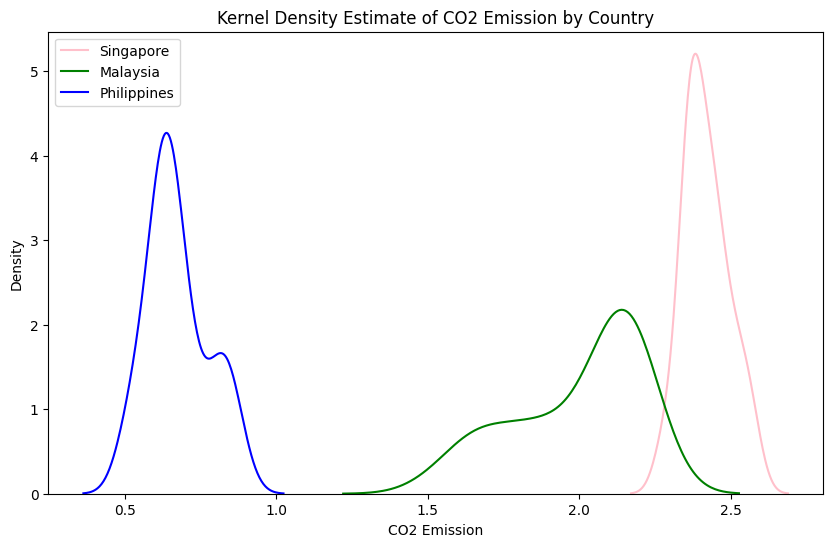

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
countries = ['Singapore', 'Malaysia', 'Philippines']
co2_singapore = df[df['Country'] == 'Singapore']['CO2']
co2_malaysia = df[df['Country'] == 'Malaysia']['CO2']
co2_philippines = df[df['Country'] == 'Philippines']['CO2']
plt.figure(figsize=(10, 6))
sns.kdeplot(co2_singapore, color='pink', label='Singapore')
sns.kdeplot(co2_malaysia, color='green', label='Malaysia')
sns.kdeplot(co2_philippines, color='blue', label='Philippines')
plt.xlabel('CO2 Emission')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of CO2 Emission by Country')
plt.legend()
plt.show()

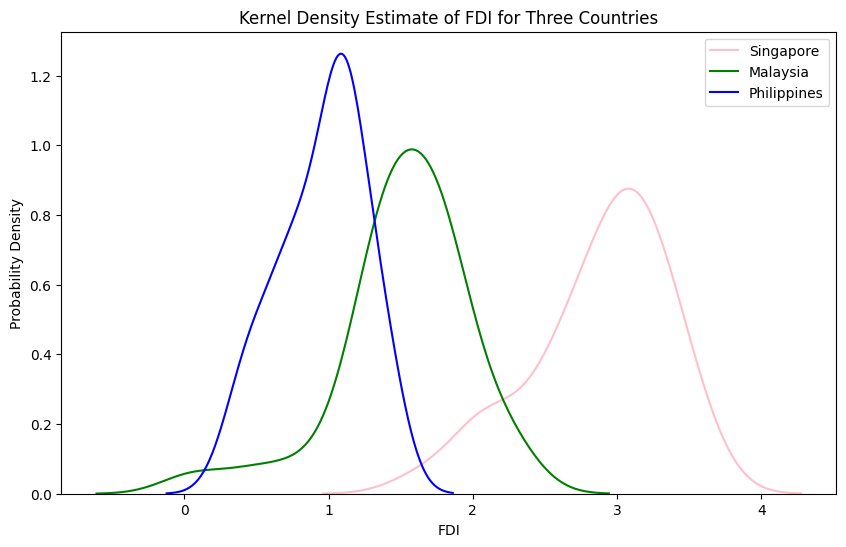

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
countries = ['Singapore', 'Malaysia', 'Philippines']
fdi_by_country = {}
for country in countries:
    fdi_by_country[country] = df[df['Country'] == country]['FDI']
plt.figure(figsize=(10, 6))
sns.kdeplot(fdi_by_country['Singapore'], color='pink', label='Singapore')
sns.kdeplot(fdi_by_country['Malaysia'], color='green', label='Malaysia')
sns.kdeplot(fdi_by_country['Philippines'], color='blue', label='Philippines')
plt.xlabel("FDI")
plt.ylabel("Probability Density")
plt.title("Kernel Density Estimate of FDI for Three Countries")
plt.legend()
plt.show()

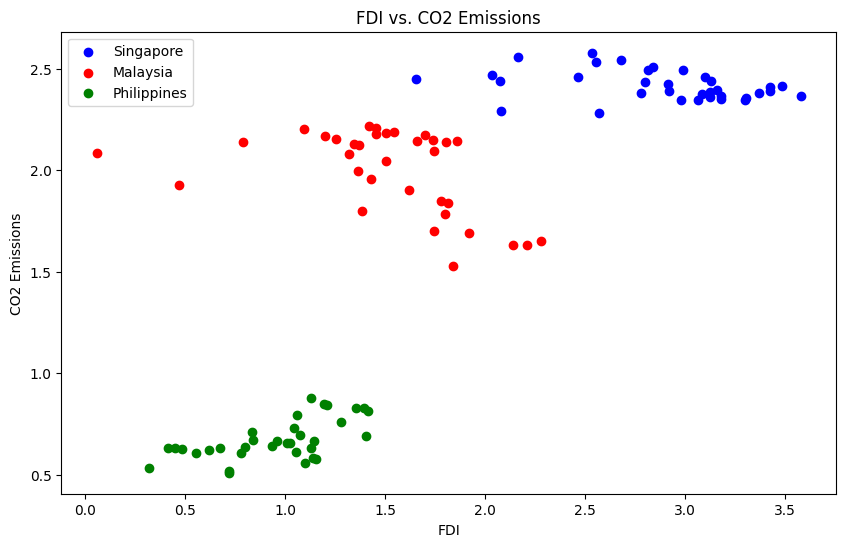

In [34]:
import matplotlib.pyplot as plt
countries = ['Singapore', 'Malaysia', 'Philippines']
df_filtered = df[df['Country'].isin(countries)][['Country', 'FDI', 'CO2']]
plt.figure(figsize=(10, 6))
for country, color, label in zip(countries, ['blue', 'red', 'green'], countries):
    plt.scatter(df_filtered[df_filtered['Country'] == country]['FDI'],
                df_filtered[df_filtered['Country'] == country]['CO2'],
                color=color, label=label)
plt.xlabel('FDI')
plt.ylabel('CO2 Emissions')
plt.title('FDI vs. CO2 Emissions')
plt.legend()
plt.show()

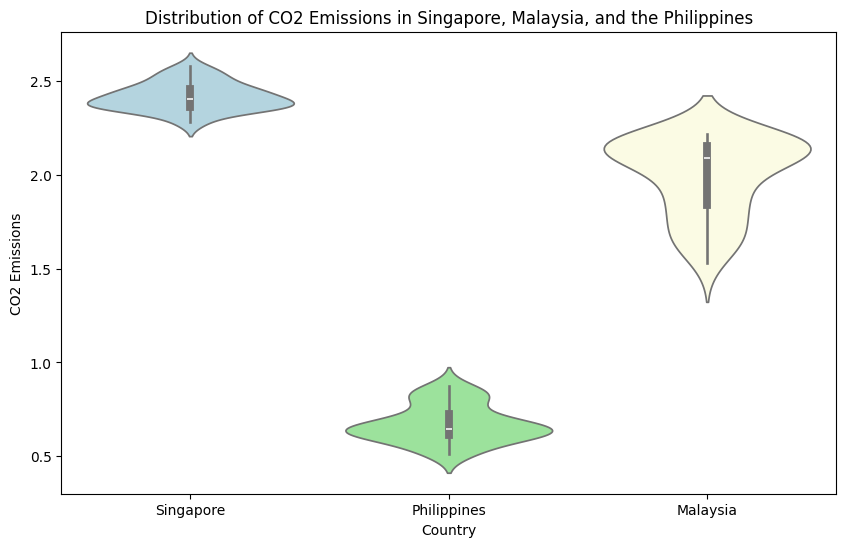

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(x='Country', y='CO2', hue='Country', data=df, palette=['lightblue', 'lightgreen', 'lightyellow'], legend=False)
plt.xlabel("Country")
plt.ylabel("CO2 Emissions")
plt.title("Distribution of CO2 Emissions in Singapore, Malaysia, and the Philippines")
plt.show()

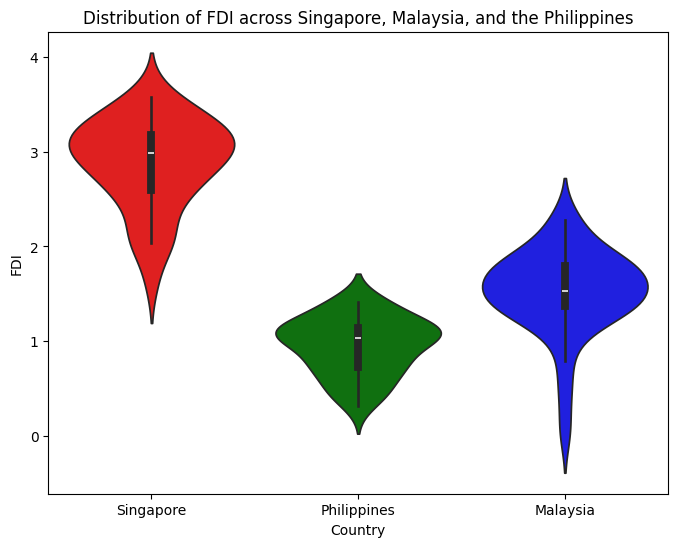

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country', y='FDI', hue='Country', data=df, palette=['red', 'green', 'blue'], legend=False)
plt.title('Distribution of FDI across Singapore, Malaysia, and the Philippines')
plt.xlabel('Country')
plt.ylabel('FDI')
plt.show()

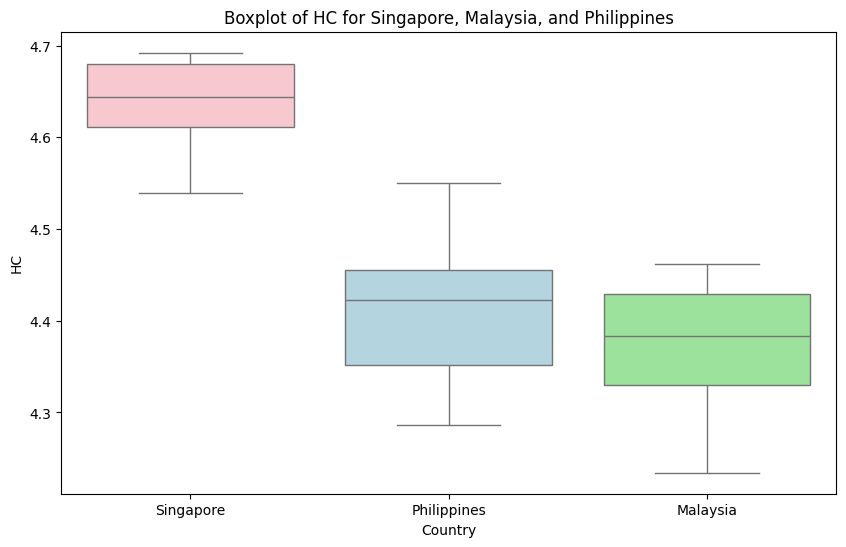

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
countries = ['Singapore', 'Malaysia', 'Philippines']
df_selected = df[df['Country'].isin(countries)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='HC', hue='Country',data=df_selected, palette=['pink', 'lightblue', 'lightgreen'], legend=False)
plt.title('Boxplot of HC for Singapore, Malaysia, and Philippines')
plt.xlabel('Country')
plt.ylabel('HC')
plt.show()